### Step 1: Setup and Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Step 2: Load and Explore the Dataset
- Load the CSV file
- Display basic information about the dataset
- Check data types and structure

In [4]:
students_db = pd.read_csv('StudentPerformanceFactors.csv')

In [5]:
students_db.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
students_db.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
students_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Step 3: Data Cleaning and Preprocessing
- Check for missing values and handle them
- Remove duplicates if any
- Verify data quality

In [8]:
students_db.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
students_db=students_db.dropna()

In [10]:
students_db.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [11]:
students_db.duplicated().sum()

0

### Check Unique Values

In [12]:
continuous_cols = [
    'Hours_Studied', 'Sleep_Hours', 'Attendance',
    'Previous_Scores', 'Tutoring_Sessions',
    'Physical_Activity', 'Exam_Score'
]

for col in continuous_cols:
    print(f"\nUnique values in '{col}':")
    print(students_db[col].unique())



Unique values in 'Hours_Studied':
[23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3 39  2 37 44]

Unique values in 'Sleep_Hours':
[ 7  8  6 10  9  5  4]

Unique values in 'Attendance':
[ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]

Unique values in 'Previous_Scores':
[ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]

Unique values in 'Tutoring_Sessions':
[0 2 1 3 4 5 6 7 8]

Unique values in 'Physical_Activity':
[3 4 2 1 5 0 6]

Unique values in 'Exam_Score':
[ 67  61  74  71  70  66  69  72  68  65  64  60  63  62 100  76  79  73
  78  89  75  59  86  97  83  84  80  58  94  55  92  82  77 101  88  91
  99  87  57  96  98  95  85  93  56]


### Check The Outliers

In [13]:
outliers_dict = {}

for col in continuous_cols:
    Q1 = students_db[col].quantile(0.25)
    Q3 = students_db[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = students_db[(students_db[col] < lower_bound) | (students_db[col] > upper_bound)]
    
    if not outliers.empty:
        outliers_dict[col] = {
            'count': len(outliers),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'indices': outliers.index.tolist()
        }

# 4. Print summary of detected outliers
for col, info in outliers_dict.items():
    print(f"\nOutliers in '{col}': {info['count']} rows")
    print(f"  - Lower Bound: {info['lower_bound']:.2f}")
    print(f"  - Upper Bound: {info['upper_bound']:.2f}")



Outliers in 'Hours_Studied': 40 rows
  - Lower Bound: 4.00
  - Upper Bound: 36.00

Outliers in 'Tutoring_Sessions': 423 rows
  - Lower Bound: -0.50
  - Upper Bound: 3.50

Outliers in 'Exam_Score': 103 rows
  - Lower Bound: 59.00
  - Upper Bound: 75.00


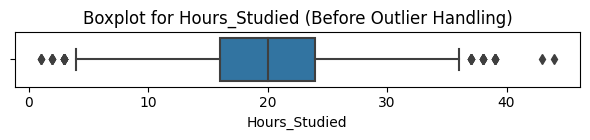

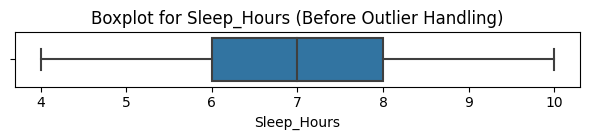

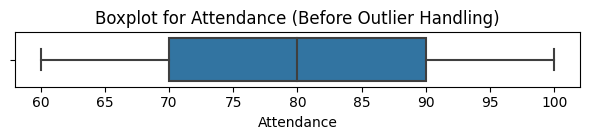

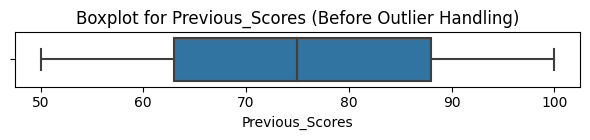

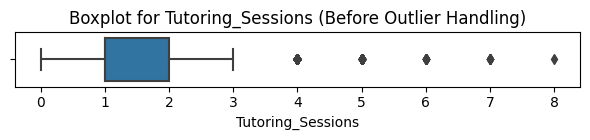

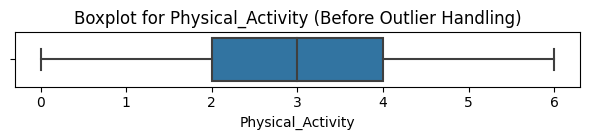

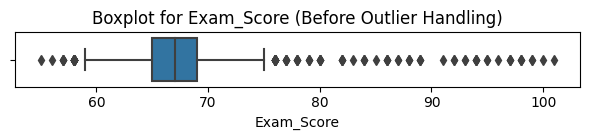

In [14]:
for col in continuous_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=students_db[col])
    plt.title(f"Boxplot for {col} (Before Outlier Handling)")
    plt.tight_layout()
    plt.show()

### Cap outliers using IQR method

In [15]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

for col in continuous_cols:
    cap_outliers_iqr(students_db, col)

### Visualize again after capping

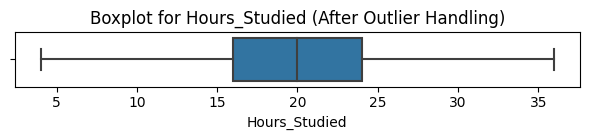

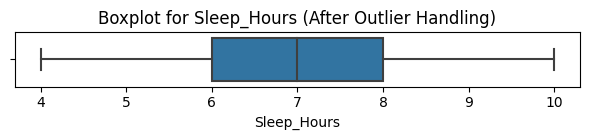

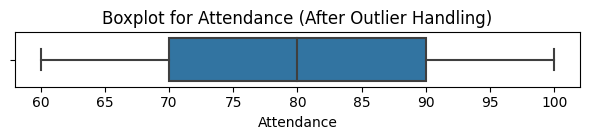

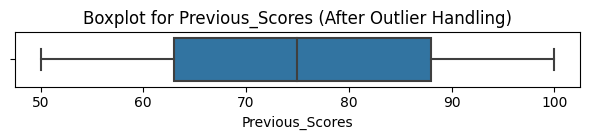

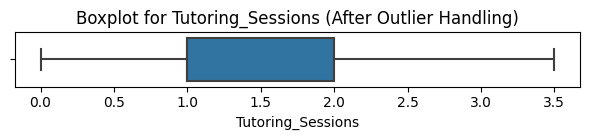

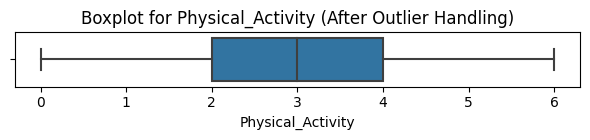

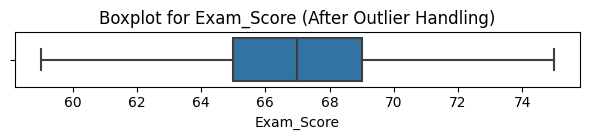

In [16]:
for col in continuous_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=students_db[col])
    plt.title(f"Boxplot for {col} (After Outlier Handling)")
    plt.tight_layout()
    plt.show()

### Step 4: Exploratory Data Analysis
- Analyze target variable distribution
- Create correlation matrix for numerical features
- Visualize relationships between variables
- Analyze categorical variables' impact on exam scores


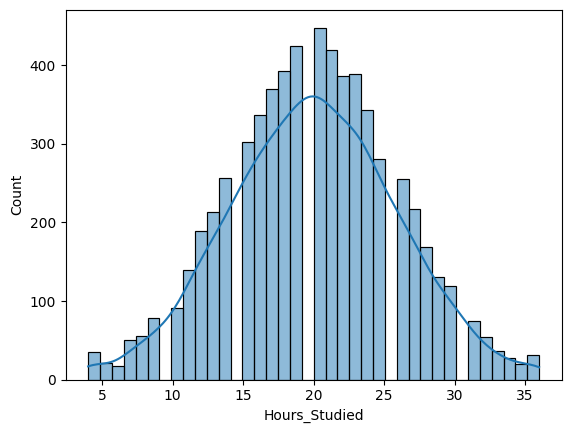

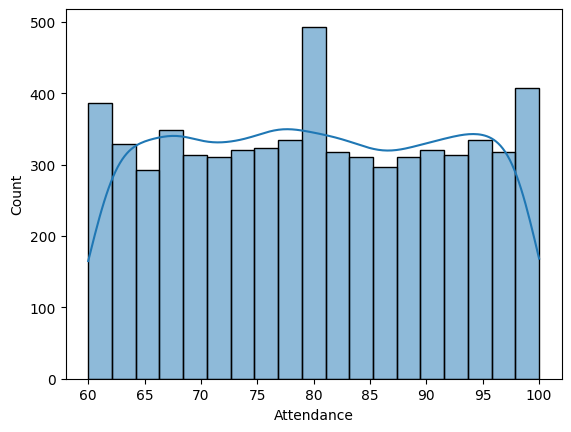

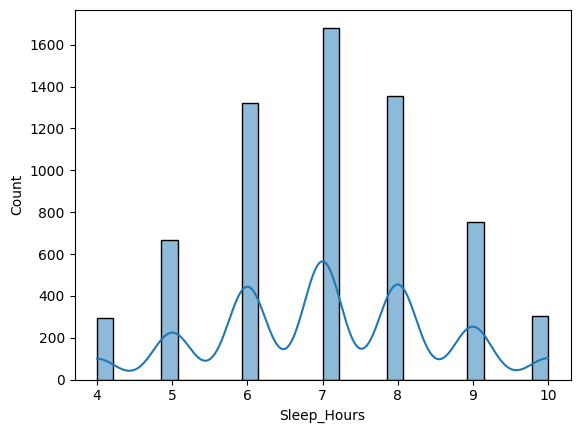

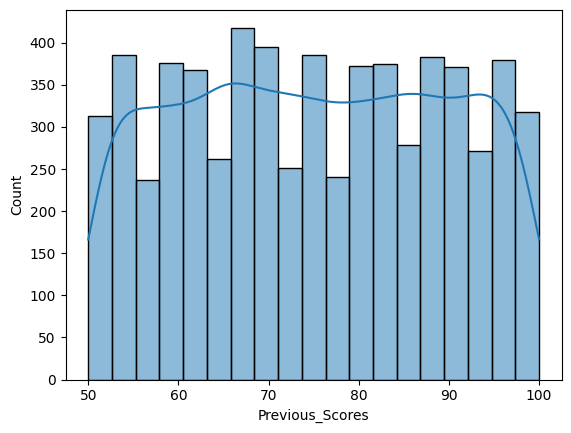

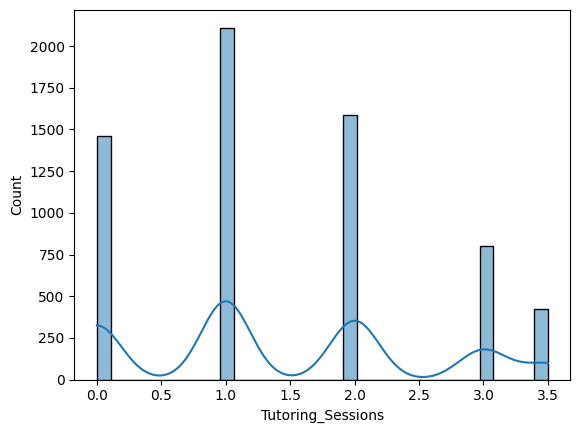

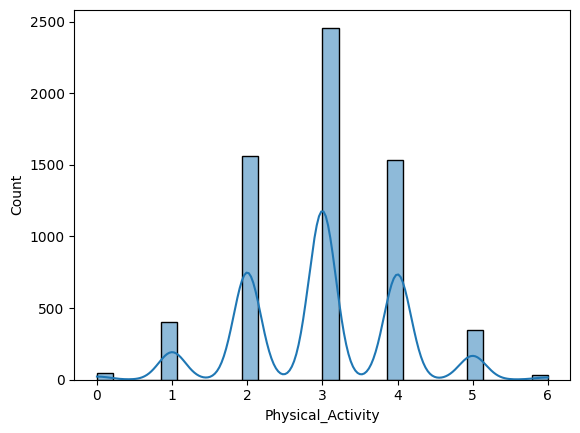

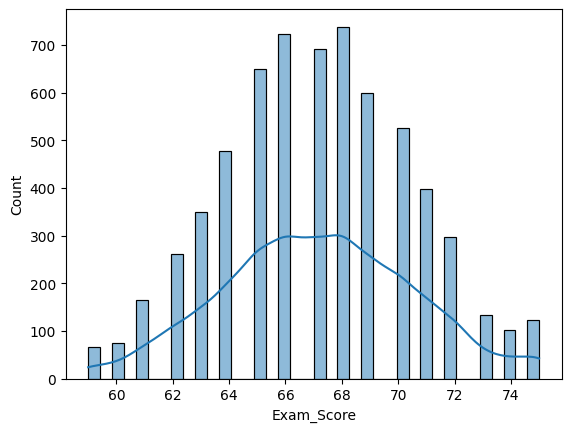

In [17]:
for col in students_db:
    if students_db[col].dtype != 'O':
        sns.histplot(students_db[col],kde=True)
        plt.show()


#### Hours Studied vs Exam Score

c:\Users\George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

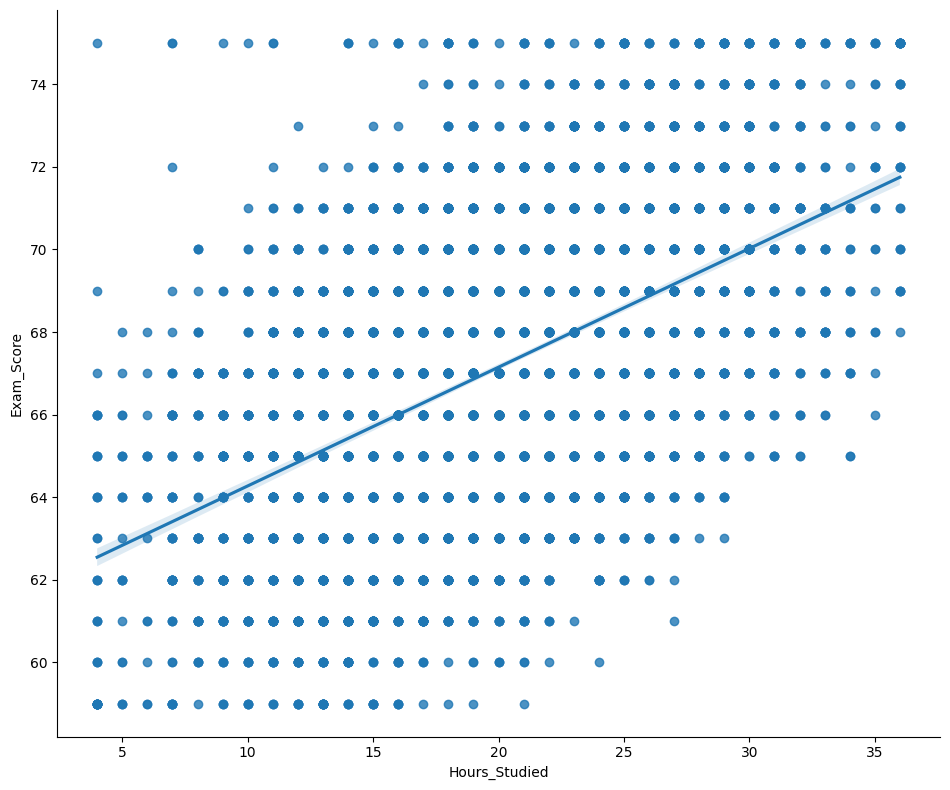

In [18]:
plt.figure(figsize=(8,8))
sns.lmplot(x='Hours_Studied', y='Exam_Score', data=students_db, height=8, aspect=1.2)
plt.show()

### Correlation Matrix of All Variables

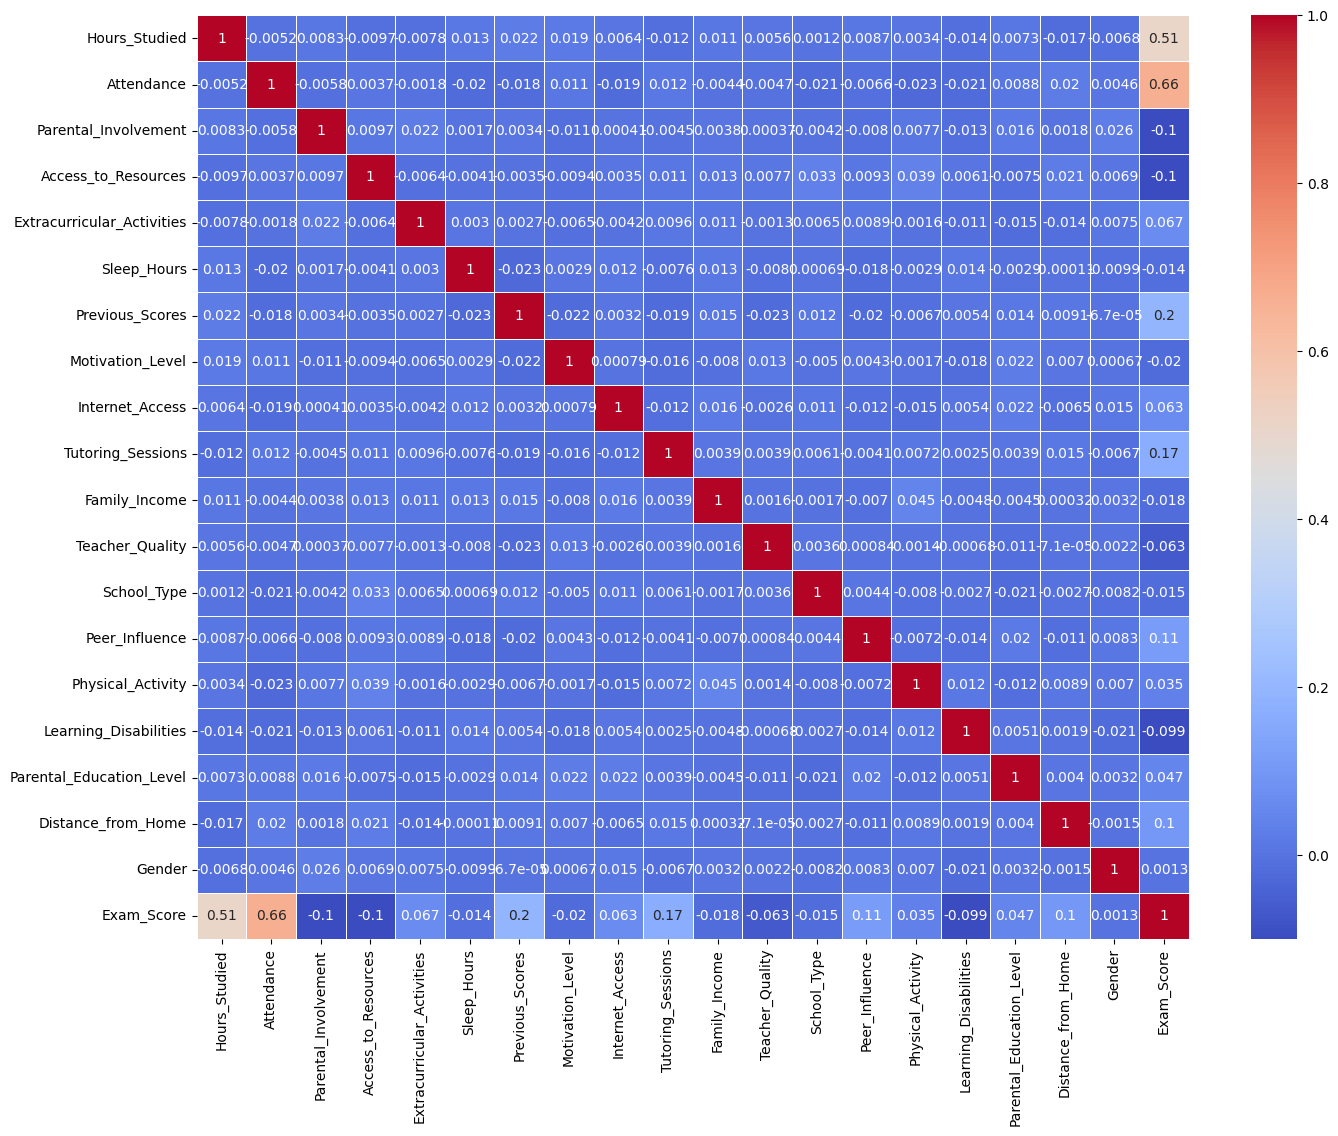

In [19]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    students_db[column] = le.fit_transform(students_db[column])
    label_encoders[column] = le


plt.figure(figsize=(16, 12))
correlation_matrix = students_db.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Correlation Analysis Summary

## Key Observations

- **Top correlated features with Exam Score:**
  - `Attendance` (**0.58**) – strongest positive impact
  - `Hours_Studied` (0.45)
  - `Parental_Involvement` (0.26)
  - `Previous_Scores` (0.17)
  - `Tutoring_Sessions` (0.16)
  - `Internet_Access` (0.051)

- **Low or no correlation:**
  - `Gender`, `Distance_from_Home`, `School_Type`, `Parental_Education_Level`, `Peer_Influence`, `Physical_Activity`
  - These may have negligible or nonlinear impact on exam performance.

- **Mild negative correlation:**
  - `Learning_Disabilities` (-0.084)

---

## Insights
- **Attendance and Hours Studied** are the most important predictors of exam performance.
- Other features like `Parental_Involvement` and `Tutoring_Sessions` also positively influence scores.
- Demographic and lifestyle features show limited direct correlation and may require nonlinear modeling to extract value.

---

# Selected Features for Modeling

## Top Positively Correlated Features to Use:
- `Attendance`
- `Hours_Studied`
- `Parental_Involvement`
- `Previous_Scores`
- `Tutoring_Sessions`
- `Internet_Access`

## Optional Features (Low correlation, explore further):
- `Parental_Education_Level`
- `Teacher_Quality`
- `Access_to_Resources`
- `Family_Income`

## Exclude (for now):
- `Gender`
- `Distance_from_Home`
- `School_Type`
- `Peer_Influence`
- `Physical_Activity`
- `Learning_Disabilities` (unless domain knowledge suggests otherwise)

---


### Step 5: Feature Engineering
- Encode categorical variables using Label Encoding
- Prepare features for modeling

In [20]:
from sklearn.preprocessing import LabelEncoder

encoded_students_db = students_db.copy()

categorical_cols = encoded_students_db.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    encoded_students_db[col] = le.fit_transform(encoded_students_db[col])
    label_encoders[col] = le 

print("Categorical columns encoded:")
print(categorical_cols.tolist())

encoded_students_db.head()


Categorical columns encoded:
[]


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0.0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2.0,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2.0,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1.0,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3.0,2,0,1,1,4,0,0,2,0,70


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = encoded_students_db.copy()

X = df.drop(columns=['Exam_Score'])  # Features
y = df['Exam_Score']                 # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training features shape:", X_train_scaled.shape)
print("Test features shape:", X_test_scaled.shape)

Training features shape: (5102, 19)
Test features shape: (1276, 19)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = lr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Evaluation Metrics:
Mean Squared Error (MSE): 1.86
Root Mean Squared Error (RMSE): 1.36
Mean Absolute Error (MAE): 0.96
R² Score: 0.8413


In [24]:
importance = pd.Series(lr_model.coef_, index=X.columns).sort_values(ascending=False)

print("\n Feature Importance (coefficients):")
print(importance)


 Feature Importance (coefficients):
Attendance                    2.253404
Hours_Studied                 1.724084
Previous_Scores               0.671026
Tutoring_Sessions             0.583055
Peer_Influence                0.381642
Distance_from_Home            0.327401
Internet_Access               0.258799
Extracurricular_Activities    0.235909
Physical_Activity             0.195921
Parental_Education_Level      0.112387
Gender                        0.005927
Sleep_Hours                  -0.009933
School_Type                  -0.014614
Family_Income                -0.094152
Motivation_Level             -0.121037
Teacher_Quality              -0.202844
Learning_Disabilities        -0.264468
Parental_Involvement         -0.331293
Access_to_Resources          -0.345401
dtype: float64


In [25]:
from sklearn.preprocessing import PolynomialFeatures
df = encoded_students_db.copy()
X_poly_raw = df.drop(columns=['Exam_Score'])
y_poly = df['Exam_Score']

X_poly_train_raw, X_poly_test_raw, y_poly_train, y_poly_test = train_test_split(
    X_poly_raw, y_poly, test_size=0.2, random_state=42
)

In [26]:
poly_scaler = StandardScaler()
X_poly_train_scaled = poly_scaler.fit_transform(X_poly_train_raw)
X_poly_test_scaled = poly_scaler.transform(X_poly_test_raw)

In [27]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_poly_train_scaled)
X_poly_test = poly.transform(X_poly_test_scaled)

In [28]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_poly_train)

LinearRegression()

In [29]:
y_poly_pred = poly_model.predict(X_poly_test)

In [30]:
mse_poly = mean_squared_error(y_poly_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_poly_test, y_poly_pred)
r2_poly = r2_score(y_poly_test, y_poly_pred)

In [31]:
print("\nPolynomial Regression (Degree=2):")
print(f"  - RMSE: {rmse_poly:.2f}")
print(f"  - MAE: {mae_poly:.2f}")
print(f"  - R² Score: {r2_poly:.4f}")


Polynomial Regression (Degree=2):
  - RMSE: 0.93
  - MAE: 0.40
  - R² Score: 0.9265


### Step 8: Visualization of Results
- Plot actual vs predicted values

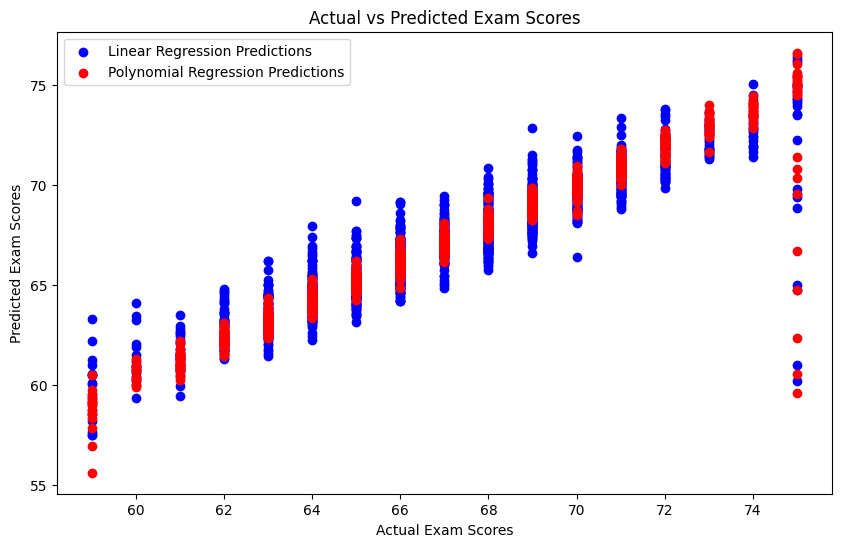

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression Predictions')
plt.scatter(y_poly_test, y_poly_pred, color='red', label='Polynomial Regression Predictions')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.legend()
plt.show()